In [1]:
import json as js
import glob
import sys
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction import text 
from sklearn.cluster import KMeans, MiniBatchKMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool
import os
from copy import deepcopy
import time
import datetime
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hza0020\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
additional_stop_words = ['rt','t','http','u','s','just','follow'] ##USE THIS FOR STOP WORDS
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [3]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in tokenizer.tokenize(doc)]

In [4]:
directory = 'C:/Users/hza0020/Documents/mytweets/*'
dictionary = 'C:/Users/hza0020/Documents/AFINN-111.txt'
# you can run below code to find pattern of folder addresses in your device:
# import os
# print(os.getcwd())

In [5]:
fdict = open(dictionary,'r')
sent_dict = {}
for line in fdict:
    line = line.strip('\n')
    line = line.split('\t')
    sent_dict[line[0]] = int(line[1])

## LOAD TWEET OBJECTS

In [6]:
tweet_objects = []
dirs = glob.glob(directory)
for dr in dirs:
    files = glob.glob(dr+'/*')
    for f in files:
            fin = open(f,'r')
            for line in fin:
                try:
                    dat = js.loads(line)
                    tweet_objects.append(dat)
                except:
                    continue
            fin.close()

In [7]:
months = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07',\
         'Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}

In [8]:
fout = open('tmp.dat','w')
for ln in tweet_objects:
    try:
        entities = ln['entities']
        hashtags = entities['hashtags']
        user_mentions = entities['user_mentions']
    except KeyError:
        continue
    for hashtag in hashtags:
        try:
            hashtag = hashtag['text']
            date = ln['created_at']
            #date = date.split()
            date = str(date)#str(months[date[1]])+str(date[2])+'18_'+str(date[3])
            favorite_count = ln['favorite_count']
            user = ln['user']
            followers = user['followers_count']
            username = user['screen_name']
            location = user['location']
            txt = ln['text'].replace('\n','')
            fout.write(date + '\t' + str(favorite_count)+','+str(followers)+',"'+str(username)+'","'+str(location)+'","'+str(txt)+'"\n')
        except UnicodeEncodeError:#.encode('utf-8')
            continue
fout.close()

In [12]:
df = pd.read_csv('tmp.dat',error_bad_lines=False,header=None,names=\
                 ['date','followers','username','location','tweet'],\
                 delimiter=',',index_col=False)#,encoding='latin-1',encoding='utf-8'
df.shape[0]
df.drop_duplicates(inplace=True)

In [13]:
rm_duplicates = True
if rm_duplicates == False:
    df['rt'] = df['tweet'].str.split(':', expand=True).ix[:,0]
    df.drop_duplicates(subset=['rt'], keep='first',inplace=True)
    df.rt.head()
    df.shape[0]

In [14]:
df.shape[0]

24415

In [15]:
df.head(25)

,date,followers,username,location,tweet
0,Mon Aug 13 22:35:55 +0000 2018\t0,21,RaLopez404,"Woodhaven, NY",#ilovethe80 #myadidas #Adidas step up #nike do...
4,Thu Aug 09 07:14:30 +0000 2018\t0,218,SeymorePutts,None,RT @BerniceKing: Many who defend #AlexJones f...
5,Thu Aug 09 21:40:44 +0000 2018\t0,857,ReneeB_75,DMV,#ImStillWithHer @maddow #AMJOY #Russiagate #wo...
12,Tue Aug 14 13:22:39 +0000 2018\t0,150,jenniferbristow,"Holland, Michigan",RT @CHRIS_Daughtry: Hey @nike I was SO HAPPY t...
13,Sun Aug 12 19:32:53 +0000 2018\t0,291,pjtaylorjr,"Fort Worth, TX",Dear people that still hate @Kaepernick7 and #...
14,Thu Aug 09 03:23:58 +0000 2018\t0,132,Geena_Lyon,"High Desert, CA","RT @HarryForCT: Iran, give up your nukes if yo..."
16,Wed Aug 15 16:43:01 +0000 2018\t0,1218,TrueLies6,The If City,RT @J23app: Up-close with the Purple Cactus J...
17,Mon Aug 13 09:06:51 +0000 2018\t0,8,Fox54710,"Sommerviller, France",RT @Saintetixx: AS Nancy Lorraine kit redesign...
27,Mon Aug 13 11:54:47 +0000 2018\t0,63728,BotYeezy,United States,#Nike React Element 87 Desert SandColor: Des...
28,Thu Aug 09 09:51:30 +0000 2018\t0,796,Meggingsrebels,None,RT @Belew3Belew: Messing around with my photo ...


In [16]:
#it removes the tweets that do not have any date for data cleaning
dates = list(df.date)
cleanDates = []
favs = []
ct = 0
for date in dates:
    date = date.split('\t')
    try:
      ts = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(date[0],'%a %b %d %H:%M:%S +0000 %Y'))
      favs.append(int(date[1]))
      cleanDates.append(ts)
      ct+=1
    except:
      cleanDates.append(np.NaN)
      favs.append(0)
print(ct)
favs.reverse()
cleanDates.reverse()

24415


In [17]:
print (len(cleanDates))
se = pd.Series(cleanDates)
df.date = se.values

24415


In [18]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Certain words can be used in order to filter such tweets.
*** Enter these words below in the bad_terms list.
'''
bad_terms = ['cock','ManiKENniMonica','nudes']
for i in range(len(bad_terms)):
    df.bad = df['tweet'].str.lower().str.contains(bad_terms[i].lower())
    df = df[df.bad == False]

C:\Users\hza0020\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\hza0020\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\hza0020\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [19]:
df.shape[0]

23353

## COUNTING HASHTAGS AND CO-OCCURANCE OF HASHTAGS

In [20]:
tweets = list(df.tweet)

In [21]:
hashtags = ['#BoycottNike','#ImWithKap','#JustDoIt','#Nike','@Nike','@kaepernick7',\
           '#BoycottKaepernick','#ColinKaepernick','#NFL']
for i, tag in enumerate(hashtags): hashtags[i] = tag.lower() 
counts = [0 for i in range(len(hashtags))]
for tweet in tweets:
    tweet = tweet.lower()
    for i, tag in enumerate(hashtags):
        if tag in tweet:
            counts[i] += 1
for i, tag in enumerate(hashtags):
    print(tag.upper()+':   '+str(counts[i]))

#BOYCOTTNIKE:   926
#IMWITHKAP:   282
#JUSTDOIT:   14205
#NIKE:   5773
@NIKE:   6629
@KAEPERNICK7:   6672
#BOYCOTTKAEPERNICK:   16
#COLINKAEPERNICK:   780
#NFL:   270


In [54]:
tcounts = deepcopy(counts)
# A shallow copy constructs a new compound object and then (to the extent possible) 
# inserts references into it to the objects found in the original.
# A deep copy constructs a new compound object and then, recursively, 
# inserts copies into it of the objects found in the original.

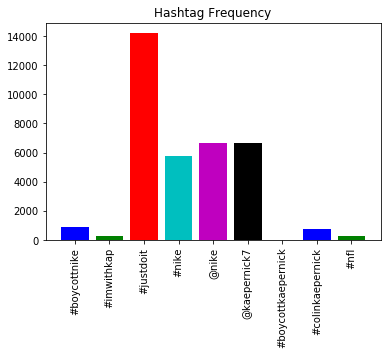

In [23]:
plt.bar(hashtags,counts,color=['b','g','r','c','m','k','y'])
plt.xticks(rotation='vertical')
plt.title('Hashtag Frequency')
plt.savefig('hashtag_frequency.png')
plt.show()

## TOP HASHTAGS

In [24]:
topHashtags = {}
for tweet in tweets:
    tweet = tweet.lower()
    tweet = tweet.split(' ')
    for word in tweet:
        if len(word) == 0:
            continue
        if word[0] == '#':
            try:
                topHashtags[word] += 1
            except:
                topHashtags[word] = 1
sorted_by_value = sorted(topHashtags.items(), key=lambda kv: kv[1])
#print(sorted_by_value)

In [59]:
def plotNhashtags(d,n):
    d = dict(d)
    dkeys = [d.keys()]
    dkeys = list(dkeys[0])
    dvals = [d.values()]
    dvals = list(dvals[0])
    #print(list(dkeys[0]))
    print (dvals[-n:])
    plt.bar(dkeys[-n:],dvals[-n:],color=['r','g','c','m','b','k'])
    plt.xticks(rotation='vertical')
    plt.show()

[78, 81, 87, 91, 98, 100, 112, 133, 136, 137, 207, 239, 248, 434, 551, 642, 652, 946, 3188, 13209]


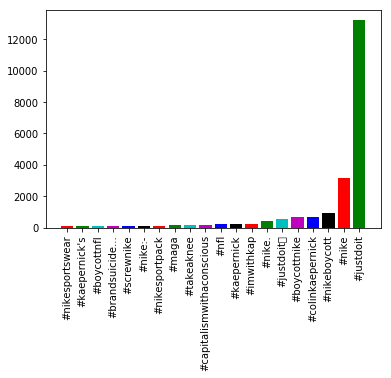

In [60]:
NUMBER_OF_TOP_HASHTAGS = 20
plotNhashtags(sorted_by_value,NUMBER_OF_TOP_HASHTAGS)

## SORT BY DATE

In [27]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date',ascending=True,inplace=True)
df.head(25)

,date,followers,username,location,tweet
40419,2018-08-08 22:11:58,13092,OctopusVentures,London,#Broadway is Sohos busiest #shopping street &...
40188,2018-08-08 23:27:38,1404,LorieKEckert,"Ohio, USA",Food for thought: The impossible is often the ...
40086,2018-08-09 00:04:56,174,LilyJeannie65,The Netherlands,RT @NurmikKa: #AllbyMyself by #Conchita Wurst ...
40076,2018-08-09 00:10:37,3,WesleySecrest,"Indian Trail, NC",A warmer 58 degrees this morning. #run #runnin...
40421,2018-08-09 00:30:39,4474,UdemyForfree100,morocco,RT @NYEditz: Twitter got you down? Then by all...
40576,2018-08-09 00:39:38,243,Gabe_Frei,"Spanish Fork, UT",Just Duet#nike #choir
40626,2018-08-09 00:57:52,204,dickysmall88888,None,"RT @CHilla415: As a @49ers fan, I'm disappoint..."
40085,2018-08-09 01:00:16,762,ClydeCoCanada,"Montréal / Toronto, Canada",@Nike Board Hit with #SexualMisconduct-Related...
40458,2018-08-09 01:32:53,1512,uniquesportshop,"England, United Kingdom",@PSG_inside @ChampionsLeague VTG 1996 NIKE PSG...
40575,2018-08-09 01:35:48,433,aitor_gl10,None,RT @Nike: Start with a dream. Finish with a fi...


In [28]:
ad_rollout = datetime.datetime(2018,9,2,23,59)
before = df[df.date < ad_rollout]
print(before.shape[0])
after = df[df.date > ad_rollout]
print(after.shape[0])
btweets = list(before.tweet)
atweets = list(after.tweet)

2221
21132


In [29]:
for i, tag in enumerate(hashtags): hashtags[i] = tag.lower() 
bcounts = [0 for i in range(len(hashtags))]
for tweet in btweets:
    tweet = tweet.lower()
    for i, tag in enumerate(hashtags):
        if tag in tweet:
            bcounts[i] += 1
for i, tag in enumerate(hashtags):
    print(tag.upper()+':   '+str(bcounts[i]))

#BOYCOTTNIKE:   23
#IMWITHKAP:   56
#JUSTDOIT:   1087
#NIKE:   624
@NIKE:   838
@KAEPERNICK7:   202
#BOYCOTTKAEPERNICK:   0
#COLINKAEPERNICK:   76
#NFL:   33


In [30]:
for i, tag in enumerate(hashtags): hashtags[i] = tag.lower() 
acounts = [0 for i in range(len(hashtags))]
for tweet in atweets:
    tweet = tweet.lower()
    for i, tag in enumerate(hashtags):
        if tag in tweet:
            acounts[i] += 1
for i, tag in enumerate(hashtags):
    print(tag.upper()+':   '+str(acounts[i]))

#BOYCOTTNIKE:   903
#IMWITHKAP:   226
#JUSTDOIT:   13118
#NIKE:   5149
@NIKE:   5791
@KAEPERNICK7:   6470
#BOYCOTTKAEPERNICK:   16
#COLINKAEPERNICK:   704
#NFL:   237


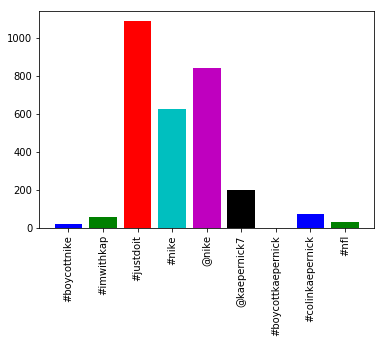

In [31]:
plt.bar(hashtags,bcounts,color=['b','g','r','c','m','k','y'])
plt.xticks(rotation='vertical')
plt.show()

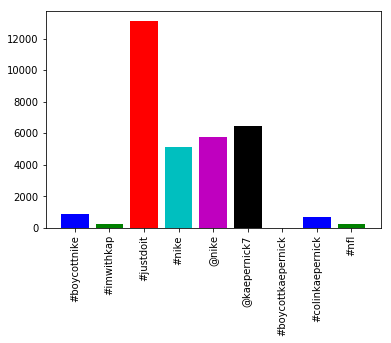

In [32]:
plt.bar(hashtags,acounts,color=['b','g','r','c','m','k','y'])
plt.xticks(rotation='vertical')
plt.show()

# Sentiment analysis using dictionary

In [33]:
tweet_sent = []
for tweet in tweets:
    tweet = tweet.lower()
    tweet = tweet.split(' ')
    sent = 0
    for word in tweet:
        word = word.strip('#')
        try:
            sent += sent_dict[word]
        except:
            pass
    tweet_sent.append(sent)

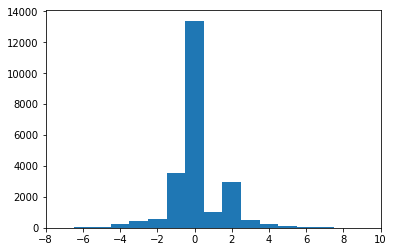

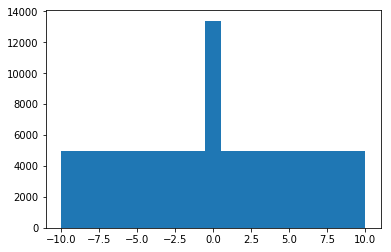

In [34]:
plt.hist(tweet_sent,bins=[-7.5,-6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])#,
        #color=['r','r','r','r','r','r','r','k','g','g','g','g','g','g','g'])
plt.xlim(-8,10)
plt.show()
plt.hist(tweet_sent,bins=[-10,-0.5,0.5,10])
plt.xlim(-11,11)
plt.show()

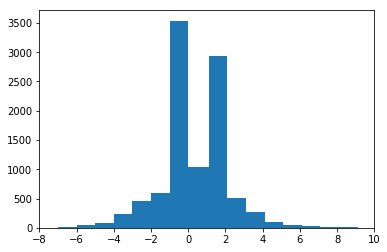

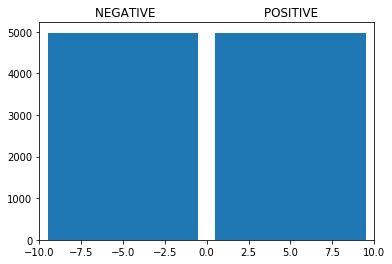

In [35]:
tweet_sent_alt = []
for tweet in tweet_sent:
    if tweet == 0:
        pass
    else:
        tweet_sent_alt.append(tweet)
plt.hist(tweet_sent_alt,bins=[-7,-6,-5,-4,-3,-2,-1,0,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1])#,
        #color=['r','r','r','r','r','r','r','k','g','g','g','g','g','g','g'])
plt.xlim(-8,10)
plt.show()
plt.hist(tweet_sent_alt,bins=[-10,0,10],rwidth=0.9)
plt.xlim(-10,10) 
plt.title('NEGATIVE                            POSITIVE')
plt.show()

In [36]:
hashtags = ['#BoycottNike','#ImWithKap','#JustDoIt','#Nike','@Nike','@kaepernick7',\
           '#BoycottKaepernick','#ColinKaepernick','#NFL']
for i, tag in enumerate(hashtags): hashtags[i] = tag.lower() 
counts = [0 for i in range(len(hashtags))]
tag_sents = {}
tag_sent_list = {}
tag_sent_values = {}
for tag in hashtags:
    tag = tag.lower()
    tag_sents[tag] = 0
    tag_sent_list[tag] = []
    tag_sent_values[tag] = 0
#tweets_ = tweets[:100]
for tweet in tweets:
    tweet = tweet.lower()
    tweet = tweet.split(' ')
    sent = 0
    for word in tweet:
        #print (word)
        word = word.strip('#')
        try:
            sent += sent_dict[word]
        except:
            pass
    for i, tag in enumerate(hashtags):
        tag = tag.lower()
        if tag in tweet:
            try:
                tag_sents[tag] += sent
                tag_sent_list[tag].append(sent)
            except:
                pass
tag_sents_ = deepcopy(tag_sents)
for i, key in enumerate(tag_sents_.keys()):
    tag_sents_[key] = tag_sents_[key]/tcounts[i]
print (tag_sents_)

{'#boycottnike': 0.0367170626349892, '#imwithkap': 0.07801418439716312, '#justdoit': -0.029778247096092926, '#nike': 0.16005543045210463, '@nike': 0.16473072861668428, '@kaepernick7': 0.043465227817745804, '#boycottkaepernick': 0.125, '#colinkaepernick': -0.13076923076923078, '#nfl': -0.11481481481481481}


### Average Raw sentiment scores per hashtag

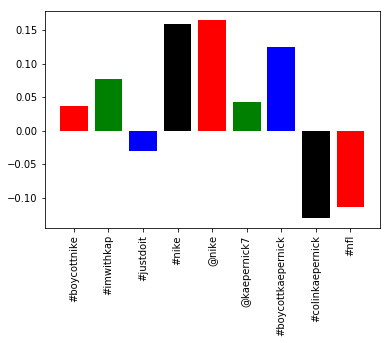

In [37]:
plt.bar(tag_sents_.keys(),tag_sents_.values(),color=['r','g','b','k'])
plt.xticks(rotation='vertical')
plt.show()

### Normalized sentiment score

In [38]:
#for i, key in enumerate(tag_sents.keys()):
#    tag_sents_[key] = (tag_sents[key]*10)/(len(tweets))
#plt.bar(tag_sents_.keys(),tag_sents_.values())
#plt.xticks(rotation='vertical')
#plt.show()

### Total positive/negative tweets per hashtag

{'#boycottnike': 32, '#imwithkap': -2, '#justdoit': -1460, '#nike': 434, '@nike': 495, '@kaepernick7': 121, '#boycottkaepernick': 1, '#colinkaepernick': -9, '#nfl': -17}
8443


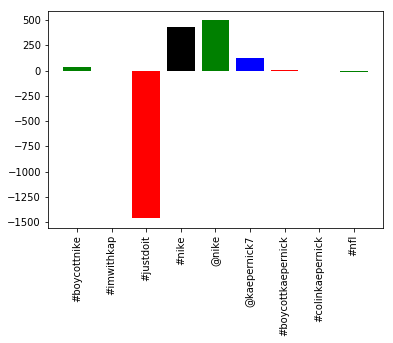

In [39]:
ct = 0
for i, tag in enumerate(tag_sent_list.keys()):
    #print(len(tag_sent_list[tag]))
    for tweet in tag_sent_list[tag]:
        if tweet > 0:
            tag_sent_values[tag] += 1
            ct += 1
        elif tweet < 0:
            tag_sent_values[tag] -= 1
            ct += 1
print (tag_sent_values)
print (ct)
plt.bar(tag_sent_values.keys(),tag_sent_values.values(),color=['g','b','r','k'])
plt.xticks(rotation='vertical')
plt.show()

### #justdoit - no neutral tweets

In [40]:
justdoit = deepcopy(tag_sent_list['#justdoit'])
justdoit_alt = []
for tweet in justdoit:
    if tweet == 0:
        pass
    else:
        justdoit_alt.append(tweet)
#print(justdoit_alt)

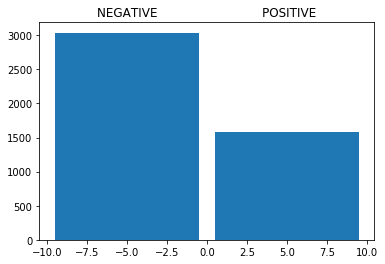

In [41]:
plt.hist(justdoit_alt,bins=[-10,0,10],rwidth=0.9)
plt.title('NEGATIVE                           POSITIVE')
plt.show()

### #nike - no neutral tweets

In [42]:
nike = deepcopy(tag_sent_list['#nike'])
nike_alt = []
for tweet in nike:
    if tweet == 0:
        pass
    else:
        nike_alt.append(tweet)

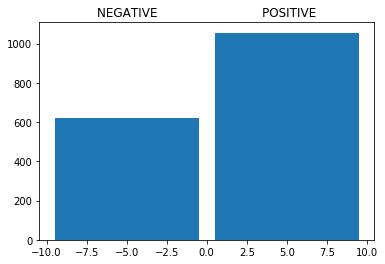

In [43]:
plt.hist(nike_alt,bins=[-10,0,10],rwidth=0.9)
plt.title('NEGATIVE                           POSITIVE')
plt.show()

### @nike - no neutral tweets

In [44]:
atnike = deepcopy(tag_sent_list['@nike'])
atnike_alt = []
for tweet in atnike:
    if tweet == 0:
        pass
    else:
        atnike_alt.append(tweet)

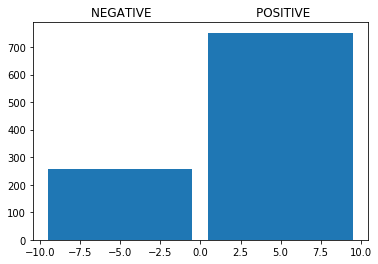

In [45]:
plt.hist(atnike_alt,bins=[-10,0,10],rwidth=0.9)
plt.title('NEGATIVE                           POSITIVE')
plt.show()

In [46]:
ad_rollout = datetime.datetime(2018,9,2,23,59)
one_week_after = datetime.datetime(2018,9,12,23,59)
before = df[df.date < ad_rollout]
after = df[df.date > ad_rollout]
btweets = list(before.tweet)
right_after = after[after.date < one_week_after]
week_past = after[after.date > one_week_after]
ratweets = list(right_after.tweet)
wptweets = list(week_past.tweet)
print(len(ratweets))
print(len(wptweets))

17225
3907


### Removes retweets

In [47]:
rm_duplicates = False
if rm_duplicates == False:
    df['rt'] = df['tweet'].str.split(':', expand=True).ix[:,0]
    df.drop_duplicates(subset=['rt'], keep='first',inplace=True)
    df.rt.head()
    df.shape[0]

C:\Users\hza0020\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
tweets = list(df.tweet)

hashtags = ['#BoycottNike','#ImWithKap','#JustDoIt','#Nike','@Nike','@kaepernick7',\
           '#BoycottKaepernick','#ColinKaepernick','#NFL']
for i, tag in enumerate(hashtags): hashtags[i] = tag.lower() 
counts = [0 for i in range(len(hashtags))]
for tweet in tweets:
    tweet = tweet.lower()
    for i, tag in enumerate(hashtags):
        if tag in tweet:
            counts[i] += 1
for i, tag in enumerate(hashtags):
    print(tag.upper()+':   '+str(counts[i]))
tcounts = deepcopy(counts)

tweet_sent = []
for tweet in tweets:
    tweet = tweet.lower()
    tweet = tweet.split(' ')
    sent = 0
    for word in tweet:
        word = word.strip('#')
        try:
            sent += sent_dict[word]
        except:
            pass
    tweet_sent.append(sent)

hashtags = ['#BoycottNike','#ImWithKap','#JustDoIt','#Nike','@Nike','@kaepernick7',\
           '#BoycottKaepernick','#ColinKaepernick','#NFL']
for i, tag in enumerate(hashtags): hashtags[i] = tag.lower() 
counts = [0 for i in range(len(hashtags))]
tag_sents = {}
tag_sent_list = {}
tag_sent_values = {}
for tag in hashtags:
    tag = tag.lower()
    tag_sents[tag] = 0
    tag_sent_list[tag] = []
    tag_sent_values[tag] = 0
#tweets_ = tweets[:100]
for tweet in tweets:
    tweet = tweet.lower()
    tweet = tweet.split(' ')
    sent = 0
    for word in tweet:
        #print (word)
        word = word.strip('#')
        try:
            sent += sent_dict[word]
        except:
            pass
    for i, tag in enumerate(hashtags):
        tag = tag.lower()
        if tag in tweet:
            try:
                tag_sents[tag] += sent
                tag_sent_list[tag].append(sent)
            except:
                pass
tag_sents_ = deepcopy(tag_sents)
for i, key in enumerate(tag_sents_.keys()):
    tag_sents_[key] = tag_sents_[key]/tcounts[i]
print (tag_sents_)

#BOYCOTTNIKE:   540
#IMWITHKAP:   105
#JUSTDOIT:   1357
#NIKE:   2916
@NIKE:   1285
@KAEPERNICK7:   530
#BOYCOTTKAEPERNICK:   8
#COLINKAEPERNICK:   312
#NFL:   132
{'#boycottnike': -0.06296296296296296, '#imwithkap': -0.05714285714285714, '#justdoit': 0.3492999263080324, '#nike': 0.08196159122085048, '@nike': 0.2396887159533074, '@kaepernick7': 0.35471698113207545, '#boycottkaepernick': 0.25, '#colinkaepernick': 0.1858974358974359, '#nfl': 0.08333333333333333}


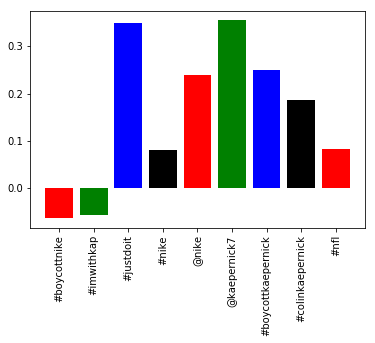

In [49]:
plt.bar(tag_sents_.keys(),tag_sents_.values(),color=['r','g','b','k'])
plt.xticks(rotation='vertical')
plt.show()

{'#boycottnike': -5, '#imwithkap': 2, '#justdoit': 172, '#nike': 69, '@nike': 120, '@kaepernick7': 77, '#boycottkaepernick': 1, '#colinkaepernick': 26, '#nfl': 3}
2451


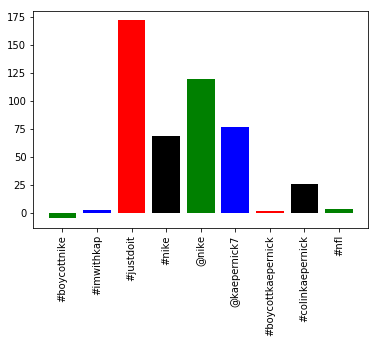

In [50]:
ct = 0
for i, tag in enumerate(tag_sent_list.keys()):
    #print(len(tag_sent_list[tag]))
    for tweet in tag_sent_list[tag]:
        if tweet > 0:
            tag_sent_values[tag] += 1
            ct += 1
        elif tweet < 0:
            tag_sent_values[tag] -= 1
            ct += 1
print (tag_sent_values)
print (ct)
plt.bar(tag_sent_values.keys(),tag_sent_values.values(),color=['g','b','r','k'])
plt.xticks(rotation='vertical')
plt.show()